## Question 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
np.random.seed(42)
X_Base = np.random.rand(100, 1)

In [ ]:
X1 = X_base + 0.01 * np.random.randn(m, 1)
X2 = X_base + 0.02 * np.random.randn(m, 1) + 21
X3 = 2 * X_base + 0.01 * np.random.randn(m, 1) + 33
X4 = -1 * X_base + 0.03 * np.random.randn(m, 1) + 40
X5 = X_base + 0.04 * np.random.randn(m, 1) + 53
X6 = 3 * X_base + 0.05 * np.random.randn(m, 1) + 62
X7 = X_base + 0.06 * np.random.randn(m, 1) + 78
X8 = X_base + 0.07 * np.random.randn(m, 1) + 88

X = np.hstack([X1, X2, X3, X4, X5, X6, X7, X8])
y = (3*X1 + 0.02*X2 + 0.5*X3 + 0.1*X4 + 5*X5 + 7*X6 + 0.3*X7 + 9*X8 +
     50 * np.random.randn(m, 1))

y = y.reshape(-1, 1)

In [ ]:
print(X.shape)
print(y.shape)

(100, 8)
(100, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

class RidgeRegression:
    """
    Cost Function:
    J(w, b) = (1 / 2m) * SUM( (y_pred - y_true)^2 ) + (lambda / 2m) * SUM( w_j^2 )

    Gradients:
    dJ/dw = (1 / m) * [ X.T @ (y_pred - y_true) + lambda * w ]
    dJ/db = (1 / m) * SUM( y_pred - y_true )
    """

    def __init__(self, learning_rate, lambda_param, n_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Gradient Descent...
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            error = y_pred - y

            mse = (1 / (2 * n_samples)) * np.sum(error**2)
            l2_reg = (self.lambda_param / (2 * n_samples)) * np.sum(self.weights**2)
            cost = mse + l2_reg
            self.cost_history.append(cost)

            dw = (1 / n_samples) * (np.dot(X.T, error) + self.lambda_param * self.weights)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
import warnings

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lambda_params = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]

best_lr = None
best_lambda = None
best_r2 = float('-inf') # Maximise...
best_cost = float('inf') # Minimise...
best_model = None

results = []

# Ignore runtime warnings (overflows) which we expect for high LR
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)

    for lr in learning_rates:
        for lambda_param in lambda_params:

            #  Training...
            model = RidgeRegression(learning_rate=lr, lambda_param=lambda_param, n_iterations=1000)
            model.fit(X_train, y_train)
            final_cost = model.cost_history[-1]

            try:
                y_pred_train = model.predict(X_train)
                y_pred_test = model.predict(X_test)

                # Calculate the Evaluation Metric: R2 Score here...
                r2_train = r2_score(y_train, y_pred_train)
                r2_test = r2_score(y_test, y_pred_test)

            except ValueError:
                # This happens if y_pred is NaN due to high LR
                r2_train = np.nan
                r2_test = np.nan

            # Store results...
            results.append({
                'learning_rate': lr,
                'lambda': lambda_param,
                'cost': final_cost,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

            # Store the best combinatoin found so far...
            if not np.isnan(r2_test) and r2_test > best_r2:
                best_lr = lr
                best_lambda = lambda_param
                best_cost = final_cost
                best_r2 = r2_test
                best_model = model

results_df = pd.DataFrame(results)
print("--- Grid Search Results ---")
print(results_df.to_string())

print("\n--- Best Model (Max Test R2) ---")
print(f"Learning Rate: {best_lr}")
print(f"Lambda: {best_lambda}")
print(f"Best Cost: {best_cost:.4f}")
print(f"Best R2 Score (test): {best_r2:.4f}")

--- Grid Search Results ---
    learning_rate        lambda          cost    r2_train     r2_test
0          0.0001  1.000000e-15  1.000732e+06 -920.921725 -713.016237
1          0.0001  1.000000e-10  1.000732e+06 -920.921725 -713.016237
2          0.0001  1.000000e-05  1.000732e+06 -920.921725 -713.016237
3          0.0001  1.000000e-03  1.000732e+06 -920.921726 -713.016236
4          0.0001  0.000000e+00  1.000732e+06 -920.921725 -713.016237
5          0.0001  1.000000e+00  1.000732e+06 -920.921767 -713.016148
6          0.0001  1.000000e+01  1.000733e+06 -920.922135 -713.015357
7          0.0001  2.000000e+01  1.000734e+06 -920.922542 -713.014484
8          0.0010  1.000000e-15  1.663004e+05 -151.929873 -120.171802
9          0.0010  1.000000e-10  1.663004e+05 -151.929873 -120.171802
10         0.0010  1.000000e-05  1.663004e+05 -151.929873 -120.171802
11         0.0010  1.000000e-03  1.663004e+05 -151.929874 -120.171798
12         0.0010  0.000000e+00  1.663004e+05 -151.929873 -120

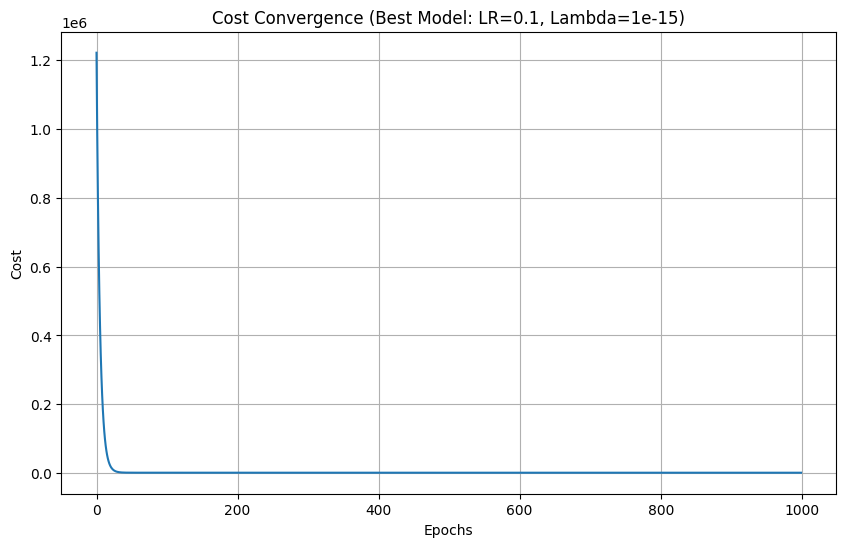

In [ ]:
if best_model:
    plt.figure(figsize=(10, 6))
    plt.plot(range(best_model.n_iterations), best_model.cost_history)
    plt.title(f'Cost Convergence (Best Model: LR={best_lr}, Lambda={best_lambda})')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()
else:
    print("No valid model was trained.")

##  Question 2

In [ ]:
data = pd.read_csv('./hitters.csv')
data.shape

(322, 20)

In [ ]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
# Handling the null values...
null_before = data.isnull().sum()
null_before = null_before[null_before > 0]
print(f"Null values Before: \n{null_before.sort_values(ascending=False)}")

data = data.dropna()

null_after = data.isnull().sum()
null_after = null_after[null_after > 0]
if len(null_after) == 0:
    print("No null values found.")
else:
    print(f"Null values After: \n{data.isnull().sum().sort_values(ascending=False)}")

print(f"Reduced shape: {data.shape}")

Null values Before: 
Salary    59
dtype: int64
No null values found.
Reduced shape: (263, 20)


In [ ]:
# handle categorical to numerical conversion...
# using one-hot encoding (3 features found)

print(f"Categorical Columns: {data.select_dtypes('object').columns.tolist()}")

Categorical Columns: ['League', 'Division', 'NewLeague']


In [ ]:
data_processed = pd.get_dummies(data, columns = ['League', 'Division', 'NewLeague'], drop_first=True)
print(f"Shape after encoding:  {data_processed.shape}")


Shape after encoding:  (263, 20)


In [ ]:
data_processed.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,False,True,False


In [ ]:
y = data_processed['Salary']
X = data_processed.drop('Salary', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Model Training...

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
print('Linear Regression Model fitted...')

ridge_reg = Ridge(alpha=0.5748)
ridge_reg.fit(X_train_scaled, y_train)
print('Ridge Regression Model fitted...')

lasso_reg = Lasso(alpha=0.5748)
lasso_reg.fit(X_train_scaled, y_train)
print('Lasso regression Model fitted...')

Linear Regression Model fitted...
Ridge Regression Model fitted...
Lasso regression Model fitted...


c:\Users\bhati\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+04, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


*   Models Evaluation...

In [ ]:
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_reg    = ridge_reg.predict(X_test_scaled)
y_pred_lasso  = lasso_reg.predict(X_test_scaled)

models =  ['Linear', 'Ridge', 'Lasso']
predictions = [y_pred_linear, y_pred_reg, y_pred_lasso]

In [ ]:
result = []
for  model, y_pred in zip(models, predictions):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    result.append({'Model': model, 'R2 Score': r2, 'RMSE': rmse})

results_df = pd.DataFrame(result).set_index('Model')
print(results_df)

        R2 Score        RMSE
Model                       
Linear  0.290745  358.168041
Ridge   0.300036  355.814422
Lasso   0.299286  356.005013


In [ ]:
best_r2_model = results_df['R2 Score'].idxmax()
print(f"Best Model (by R2 Score): {best_r2_model}")

best_rmse_model = results_df['RMSE'].idxmin()
print(f"Best Model (by RMSE): {best_rmse_model}")

Best Model (by R2 Score): Ridge
Best Model (by RMSE): Ridge


## Question 3

In [ ]:
# Since load_boston has been removed from the sklearn.datasets library, i will be using the California Housing dataset instead...

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
data_housing = pd.read_csv('./housing.csv')
data_housing.shape

(20640, 10)

In [ ]:
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print(f"Categorical Columns: {data_housing.select_dtypes('object').columns.tolist()}")
data_housing_processed = pd.get_dummies(data_housing, columns = ['ocean_proximity'], drop_first=True)
print(f"Shape after encoding:  {data_housing_processed.shape}")

Categorical Columns: ['ocean_proximity']
Shape after encoding:  (20640, 13)


In [ ]:
data_housing_processed['total_bedrooms'] = data_housing_processed['total_bedrooms'].fillna(data_housing_processed['total_bedrooms'].mean())
data_housing_processed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [ ]:
y = data_housing_processed['median_house_value']
X = data_housing_processed.drop('median_house_value', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
alphas_to_test = np.logspace(-6, 2, 100)

In [ ]:
print("Running RidgeCV...")
ridge_cv = RidgeCV(alphas=alphas_to_test,cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("RidgeCV Training Completed...")

print("Running LassoCV...")
lasso_cv = LassoCV(n_alphas=100, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
print("LassoCV Training Completed...")

Running RidgeCV...
RidgeCV Training Completed...
Running LassoCV...
LassoCV Training Completed...


In [ ]:
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

results = {
    'RidgeCV': {
        'R2 Score': r2_score(y_test, y_pred_ridge),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    },
    'LassoCV': {
        'R2 Score': r2_score(y_test, y_pred_lasso),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    }
}

In [ ]:
results_df =  pd.DataFrame(results)
print(results_df)

               RidgeCV       LassoCV
R2 Score      0.626257      0.626205
RMSE      69987.488350  69987.488350


## Question 4

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
class BinaryLogisticRegression:
    """
    Implements a binary logistic regression classifier using gradient descent.

    Cost Function (Log Loss):
    J(w, b) = -(1/m) * SUM[ y*log(p) + (1-y)*log(1-p) ]
    where p (prediction) = sigmoid(z) = 1 / (1 + e^(-z))
    and   z (linear model) = Xw + b

    Gradients:
    dJ/dw = (1/m) * [ X.T @ (p - y) ]
    dJ/db = (1/m) * SUM( p - y )
    """

    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _sigmoid(self, z):
        # 1 / (1 + e^(-z))
        # We clip to prevent overflow and log(0) errors
        z = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        if y.ndim == 1:
            y = y.reshape(-1, 1)

        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.epochs):

            error = y_pred - y

            # 5. Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # 6. Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        # Return the probability of class 1
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)

In [ ]:
class MultiClassLogisticRegressionOvR:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.models = []
        self.classes = []

    def fit(self, X, y):
        self.classes = np.unique(y)

        for i in self.classes:
            y_binary = np.where(y == i, 1, 0)

            model = BinaryLogisticRegression(learning_rate=self.lr, epochs=self.epochs)

            print(f"Training classifier for Class {i} vs. Rest.")
            model.fit(X, y_binary)

            self.models.append(model)
        print("Multiclass Training Completed.")

    def predict_proba(self, X):
        all_probas = []
        for model in self.models:
            probas =  model.predict_proba(X)
            all_probas.append(probas)
        return np.hstack(all_probas)

    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)

In [ ]:
ovr_model = MultiClassLogisticRegressionOvR(learning_rate=0.1, epochs=1000)
ovr_model.fit(X_train_scaled, y_train)

y_pred = ovr_model.predict(X_test_scaled)

accuracy =  accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred,target_names = iris.target_names))

Training classifier for Class 0 vs. Rest.
Training classifier for Class 1 vs. Rest.
Training classifier for Class 2 vs. Rest.
Multiclass Training Completed.
Accuracy: 96.67%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


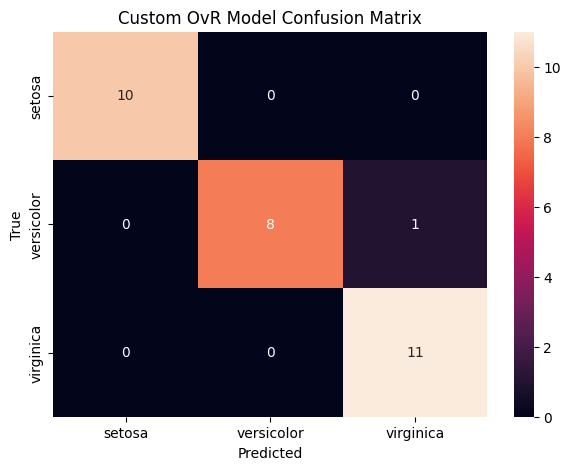

In [ ]:
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom OvR Model Confusion Matrix')
plt.show()

In [ ]:
# Taking the default LogisticRegression Classifier from the sklearn.linear_model library...
from sklearn.linear_model import LogisticRegression

sklearn_model = LogisticRegression(multi_class='ovr', solver='liblinear')
sklearn_model.fit(X_train_scaled, y_train)

y_pred_sklearn = sklearn_model.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f'Sklearn OvR accuracy: {accuracy_sklearn * 100:.2f}%')
print(f"Custom Model Accuracy: {accuracy*100:.2f}%")

Sklearn OvR accuracy: 96.67%
Custom Model Accuracy: 96.67%


c:\Users\bhati\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
